---
layout: post
title:  "K-means clustering"
date:   2021-05-05 18:14:54 +0700
categories: MachineLearning
---

K-means clustering is a simple and intuitive algorithm. The introduction would be short. In K-means clustering, we are given a dataset without labels but has an inherent structure:

<img src='https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png'>

<p  style="font-size:9px">Source: https://www.javatpoint.com/k-means-clustering-algorithm-in-machine-learning</p>

We can assume that there are K clusters (also called centroids). At the beginning, we initialize those centroids $$ \mu $$ randomly. Then each step we do two sub-steps:

We divide the data points x into each of those clusters so that the total squared distance between points $$ x_{i} $$ and centroids $$ \mu_{i} $$ is minimal. 
Similarly, with those assigned points, we move the centroids so that the process results in minimizing the total squared distance between points and centroids. The best solution is to let the centroids be at the center of their points (i.e. each is the average of its points). 

Here is the loss function of k-means clustering algorithm:

$$ Loss(x, \mu) = \sum_{i=1}^{n}||x^{(i)}-\mu_{k}||^{2}_{2} = \mu_{i=1}^{n}(x^{(i)}- \mu_{j})^{2}  \forall j \in (1,k) $$

In the first step, we assign x to $$ \mu $$ by giving it label j and then minimize loss (similar to MSE in which it takes the error measured by Euclidean distance) with respect to the given centroids:

$$ x \in j \leftarrow arg min Loss(x, \mu) $$

Easily we say that the best assignment of label y is to let each x belong to the cluster that has the closest centroid.

In the second step, with those points classified into clusters (labels j all set), we choose the new centroids that minimizes loss function:

$$ \mu \leftarrow arg min_{\mu} Loss(x, \mu) $$

$$ \Leftrightarrow \frac{\partial}{\partial \mu_{j}} \sum_{i=1}^{n}(x^{(i)}- \mu_{j})^2 = 0  \forall j \in (1,k) $$

$$ \mu_{j} \leftarrow \frac{1}{|{x^{(i)} \in \mu_{j}}|} \sum_{i \in \mu_{j}} x^{(i)} $$

For the new clusters, the best is to let the centroid to be the average of all its points.

Optimal number of clusters

There is a method called elbow in which we choose the optimal number of clusters for our dataset by choosing the elbow of the loss curve:

<img src='https://www.scikit-yb.org/en/latest/_images/elbow-4.png'>

<p   style="font-size:9px"> Source: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html </p>

# Code example

Example 1: Let's use K-means clustering algorithm for the problem of identifying similar color groups and compute the amount of forest left in photos taken by satelite.


In [1]:
!pip install yellowbrick

In [2]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd
import matplotlib.pyplot as plt


(987, 1872, 3)


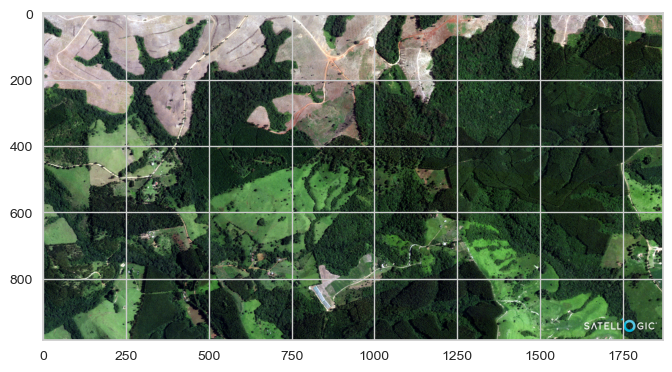

In [17]:
pic = plt.imread('forests.jpg')/255
print(pic.shape)
plt.imshow(pic)


![2Kmeans_4_2](https://user-images.githubusercontent.com/7457301/223468530-83963b4f-5fe1-48cd-8a06-351fa4352ae7.png)

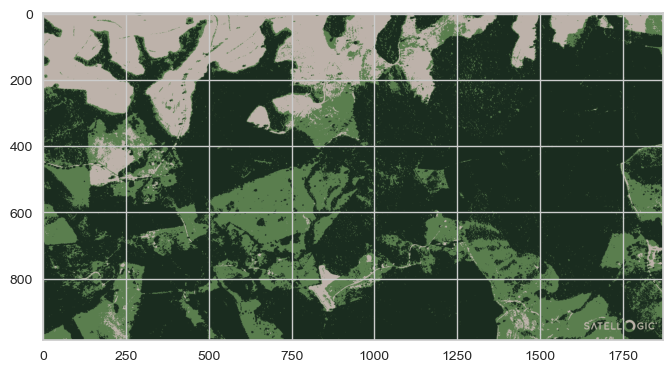

In [41]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape
# looking with our own eyes, there should be 3 clusters
# one for the white part (where we cut down tree and make infrastructure)
# one for the light green (where human has cut down the tree and use the land for civil purpose)
# one for the bold green (the remaining forest)
kmeans = KMeans(n_clusters=3, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)


![2Kmeans_5_1](https://user-images.githubusercontent.com/7457301/223468550-d01b70ca-ebff-46ba-80c3-c6b20aeba4e2.png)

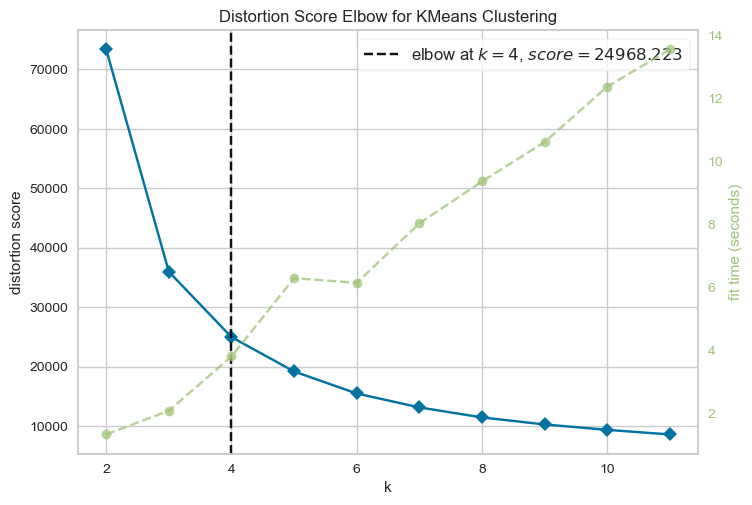

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
# when we use the elbow method, it says to choose 4 clusters
# but 4 is not necessary
visualizer = KElbowVisualizer(kmeans, k=(2,12))
visualizer.fit(pic_n)        # Fit the data to the visualizer
visualizer.show()  

![2Kmeans_6_0](https://user-images.githubusercontent.com/7457301/223468556-3bcaba55-2acc-4335-978b-d814c5008d85.png)

In [46]:
kmeans.cluster_centers_

array([[0.74138631, 0.70173583, 0.66735134],
       [0.35342198, 0.49499163, 0.3090334 ],
       [0.1056781 , 0.17483956, 0.12261974]])

In [42]:
# let's count the number of pixels in each group
# it is not very clear which category for those labels
pd.Series(kmeans.labels_).value_counts()


2    1168258
1     408385
0     271021
dtype: int64

In [43]:
# so we use the pixel value counts
# the last line has the boldest of the color -> this is the forest
pd.DataFrame(pic2show).value_counts()

0         1         2       
0.105678  0.174840  0.122620    1168258
0.353422  0.494992  0.309033     408385
0.741386  0.701736  0.667351     271021
dtype: int64

In [44]:
# let's calculate how much forest left from this satellite image
271021/(1168258+408385+271021)

0.14668305492773578

In [30]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import numpy as np


In [26]:
california_housing = fetch_california_housing(as_frame=True)
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


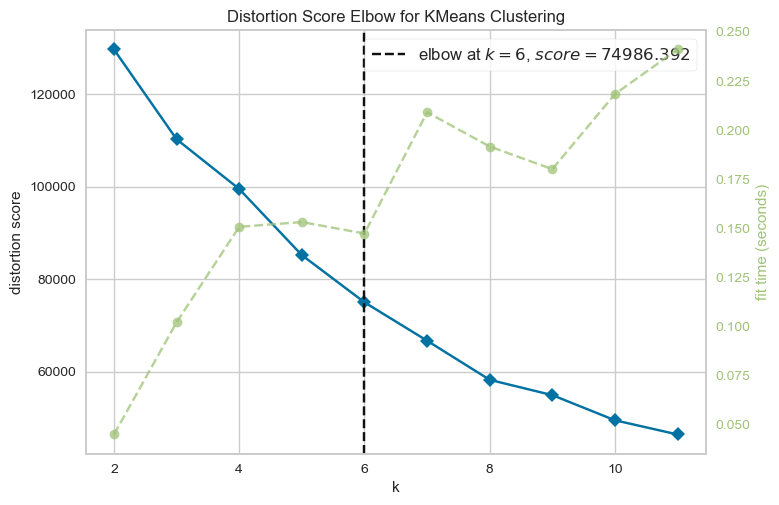

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
X = california_housing.data
y = california_housing.target
# Scale the dataset, since it has wildly different ranges
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# concatnate y so that we cluster including y
y_new=np.array(y).reshape(-1,1)
data=np.append(X_scaled, y_new, axis=1)
data=pd.DataFrame(data)

kmeans2 = KMeans(n_clusters=10, random_state=0).fit(data)
visualizer = KElbowVisualizer(kmeans2, k=(2,12))
visualizer.fit(X_scaled)        
visualizer.show()  


![2Kmeans_13_0](https://user-images.githubusercontent.com/7457301/223468569-a177122f-2479-4c57-bd50-7e6e6a92188c.png)

In [32]:
# try again with the suggestion of 6 clusters
kmeans2 = KMeans(n_clusters=6, random_state=0).fit(data)


(array([7.600e+01, 0.000e+00, 8.758e+03, 0.000e+00, 1.214e+03, 0.000e+00,
        3.386e+03, 0.000e+00, 1.000e+00, 7.205e+03]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

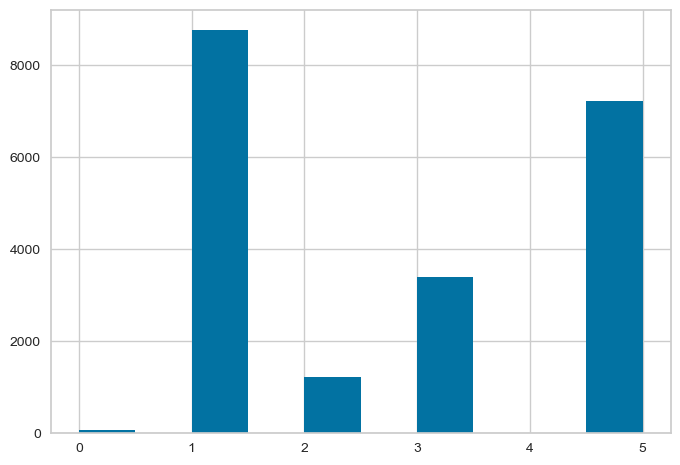

In [38]:
# the housing data now is labeled by 6 groups
# this histogram shows that the housing market is distributed with polarity
plt.hist(pd.DataFrame(kmeans2.labels_))

![2Kmeans_15_1](https://user-images.githubusercontent.com/7457301/223468579-1a199203-a41e-4d48-a9f0-96861b207c57.png)